<a href="https://colab.research.google.com/github/nyary-ben/Homework-3A/blob/main/Homework3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util 1>/dev/null

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from scipy.special import comb

Mounted at /content/drive


In [3]:
repo = buc.local_repository("https://github.com/nyary-ben/Homework-3A")

Cloning repository from GitHub.


# Homework 3A 3.24)

## 3.24a.

In [100]:
N = 50
qTotal = 100
def Omega (N,q):
  return comb(q+N-1, q)
df = pd.DataFrame(data={'q': np.arange(qTotal+1)})
df['Omega'] = Omega(N,df['q'])
df['S/k'] = np.log(df['Omega'])
Temp = (df['q'].diff(2)/df['S/k'].diff(2))
df['kT/eps'] = Temp.shift(periods=-1)
df.loc[0, ['kT/eps']] = 0
C = (df['q'].diff(2)/df['kT/eps'].diff(2))/N
df['C/Nk'] = C.shift(periods=-1)

df_round = df.round(2)
print(df_round)


       q         Omega    S/k  kT/eps  C/Nk
0      0  1.000000e+00   0.00    0.00   NaN
1      1  5.000000e+01   3.91    0.28  0.12
2      2  1.275000e+03   7.15    0.33  0.45
3      3  2.210000e+04  10.00    0.37  0.54
4      4  2.928250e+05  12.59    0.40  0.59
..   ...           ...    ...     ...   ...
96    96  1.334162e+39  90.09    2.44  0.97
97    97  2.008120e+39  90.50    2.46  0.97
98    98  3.012179e+39  90.90    2.48  0.97
99    99  4.503056e+39  91.31    2.50   NaN
100  100  6.709554e+39  91.70     NaN   NaN

[101 rows x 5 columns]


Text(0, 0.5, 'S/k')

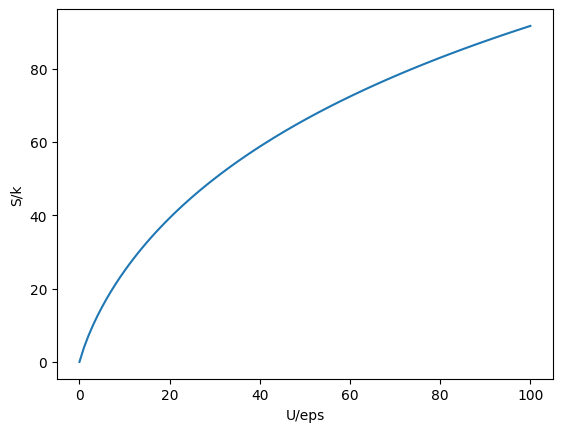

In [103]:
fig, ax = plt.subplots()
ax.plot(df['q'], df['S/k'])
ax.set_xlabel('U/eps')
ax.set_ylabel('S/k')

Text(0, 0.5, 'C/Nk')

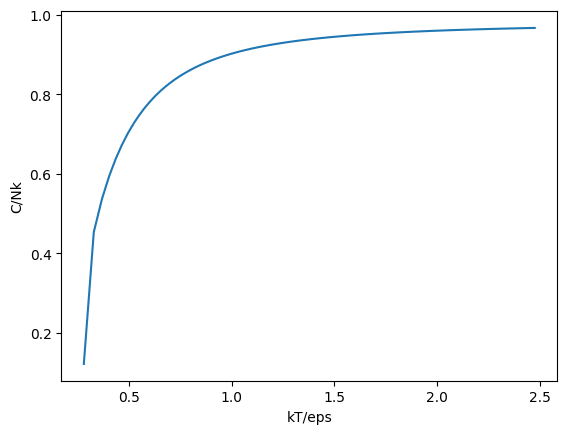

In [104]:
fig, ax = plt.subplots()
ax.plot(df['kT/eps'], df['C/Nk'])
ax.set_xlabel('kT/eps')
ax.set_ylabel('C/Nk')

### Question 3.24 a. xi.
As the temperature increase, heat capacity seems to stagnate around an asymptote value. This does not agree with the equipartition theorem as the theorem predicts that heat capacity and temperature are linearly related.

$C = \frac{f}{2}NkT$

## 3.24b.

In [106]:
N = 5000
qTotal = 100
def Omega (N,q):
  return comb(q+N-1, q)
dfB = pd.DataFrame(data={'q': np.arange(qTotal+1)})
dfB['Omega'] = Omega(N,dfB['q'])
dfB['S/k'] = np.log(dfB['Omega'])
Temp = (dfB['q'].diff(2)/dfB['S/k'].diff(2))
dfB['kT/eps'] = Temp.shift(periods=-1)
dfB.loc[0, ['kT/eps']] = 0
C = (dfB['q'].diff(2)/dfB['kT/eps'].diff(2))/N
dfB['C/Nk'] = C.shift(periods=-1)

dfB_round = dfB.round(2)
print(dfB_round)


       q          Omega     S/k  kT/eps  C/Nk
0      0   1.000000e+00    0.00    0.00   NaN
1      1   5.000000e+03    8.52    0.12  0.00
2      2   1.250250e+07   16.34    0.13  0.03
3      3   2.084584e+10   23.76    0.14  0.04
4      4   2.607293e+13   30.89    0.14  0.04
..   ...            ...     ...     ...   ...
96    96  3.150130e+205  473.18    0.25  0.31
97    97  1.654955e+207  477.14    0.25  0.31
98    98  8.607454e+208  481.09    0.25  0.31
99    99  4.432404e+210  485.03    0.25   NaN
100  100  2.260083e+212  488.96     NaN   NaN

[101 rows x 5 columns]


Text(0, 0.5, 'S/k')

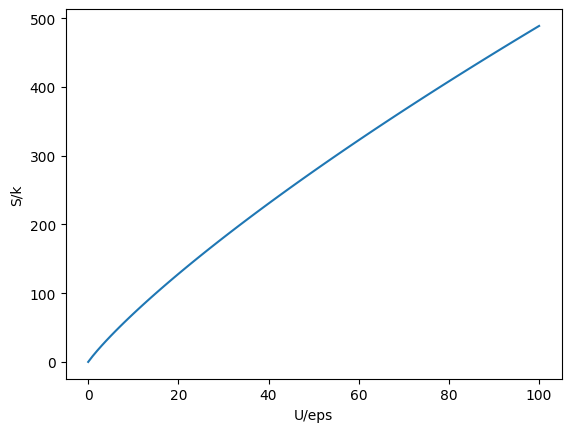

In [107]:
fig, ax = plt.subplots()
ax.plot(dfB['q'], dfB['S/k'])
ax.set_xlabel('U/eps')
ax.set_ylabel('S/k')

Text(0, 0.5, 'C/Nk')

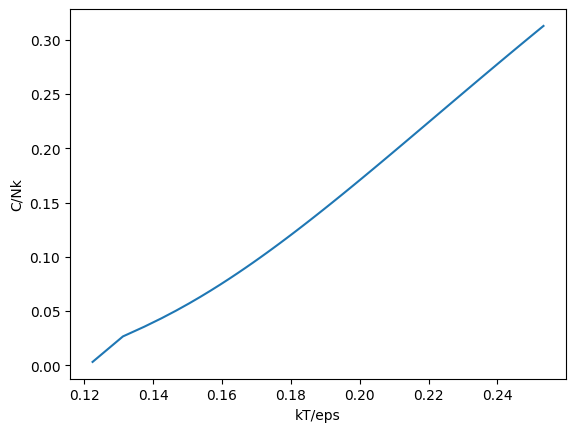

In [108]:
fig, ax = plt.subplots()
ax.plot(dfB['kT/eps'], dfB['C/Nk'])
ax.set_xlabel('kT/eps')
ax.set_ylabel('C/Nk')

## 3.24c.
I would predict Diamond would have the largest value of $\epsilon$ as it is the material with the tighest bonds, Diamond is the toughest gem on Earth which would make it the hardest to heat up so very high resistance to heat hence high $\epsilon$.

I would predict Aluminium to have the least $\epsilon$ among the other two metals as Aluminium has the least molar mass compared to Lead with 207 >> 27 (Al). This is linked to the previous exercise as Aluminium would be exercise 3.24a. and Lead would be exercise 3.24b. with more electrons so more oscillators.

## 3.24d.

### Lead
Reading the graph at 50% of high end temperature heat capacity values
I found the slope of the curve to be the heat capacity over temperature.
I will use this same slope to be the slope of my C/Nk vs kT/$\epsilon$ graph.
As since we will not compare the number of oscillators for the Lead, Aluminium and Diamond, I will neglect N from $\frac{\epsilon}{N} = slope$

In [119]:
C_l = 13
T_l = 27
Slope_l = C_l/T_l
Slope_l_round = round(Slope_l,2)
print('e/N = ',Slope_l_round)

e/N =  0.48


### Aluminium

In [116]:
C_a = 11
T_a = 85
Slope_a = C_a/T_a
Slope_a_round = round(Slope_l,2)
print('e/N = ',Slope_a_round)

e/N =  0.47


### Diamond

In [118]:
C_d = 5
T_d = 270
Slope_d = C_d/T_d
Slope_d_round = round(Slope_d,2)
print('e/N = ',Slope_d_round)

e/N =  0.02


## 3.24e.
The values are completely different, I found that the largest $\epsilon$ value happened to be the Lead followed by Aluminium and then Diamond with the least $\epsilon$ value. This was the complete opposite to my prediction.